<H1>One</H1> 
First Qiskit program. 
<hr>
<H2>Modification history </H2><br> 
<table>
    <tr>
        <th> Modified </th>
        <th> By </th>
        <th> Reason </th>
    </tr>
    <tr> 
        <td> 21-Mar-25 </td>
        <td> CBL </td> 
        <td> Original </td>
    </tr>
</table>
<hr> 
<H2> References </H2> 
<a href="https://docs.quantum.ibm.com/guides/install-qiskit"> Install Qikit </a> <br> 
<a href="https://docs.quantum.ibm.com/guides/hello-world"> qiskit hello world </a> <br> 
<a href="https://qiskit-community.github.io/qiskit-dynamics/"> Qiskit dynamics</a> <br> 
<a href="https://pypi.org/project/qiskit/"> Pypi qiskit page</a> <br> 
<a href="https://docs.quantum.ibm.com/api/qiskit/visualization"> Visualization</a> <br> 
<H2> Notes </H2>
<br> 

In [17]:
# my standard includes
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as const
#
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [3]:
# Create a GHZ State, from the website. 
qc = QuantumCircuit(3)    
qc.h(0)             # generate superposition
qc.p(np.pi / 2, 0)  # add quantum phase
qc.cx(0, 1)         # 0th-qubit-Controlled-NOT gate on 1st qubit
qc.cx(0, 2)         # 0th-qubit-Controlled-NOT gate on 2nd qubit
print(qc)

     ┌───┐┌────────┐          
q_0: ┤ H ├┤ P(π/2) ├──■────■──
     └───┘└────────┘┌─┴─┐  │  
q_1: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_2: ────────────────────┤ X ├
                         └───┘


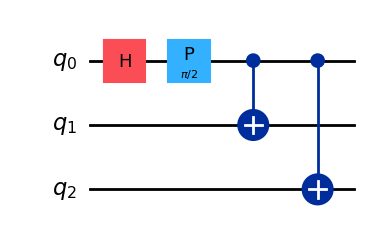

In [4]:
qc.draw(output='mpl')

In [6]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

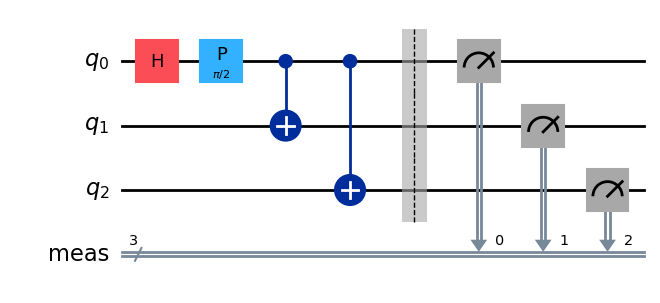

In [8]:
qc_measured.draw(output='mpl')

In [9]:
# 3. Execute using the Sampler primitive
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
print(f" > Counts: {result[0].data["meas"].get_counts()}")

 > Counts: {'111': 504, '000': 496}


In [11]:
# 2. Define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])
# 3. Execute using the Estimator primitive
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()
job = estimator.run([(qc, operator)], precision=1e-3)
result = job.result()
print(f" > Expectation values: {result[0].data.evs}")

 > Expectation values: 4.0000894614661915


In [12]:
print(operator)

SparsePauliOp(['XXY', 'XYX', 'YXX', 'YYY'],
              coeffs=[ 1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j])
